
    # YouTube Content Creators Analysis
    This notebook contains the analysis of YouTube content creators, focusing on content categories, performance metrics, and top-performing creators.
    

In [1]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Load the dataset
df = pd.read_csv('cleaned_youtubers_df.csv')
    


    ## Distribution of Content Categories
    The top 10 content categories by the number of streamers.
    

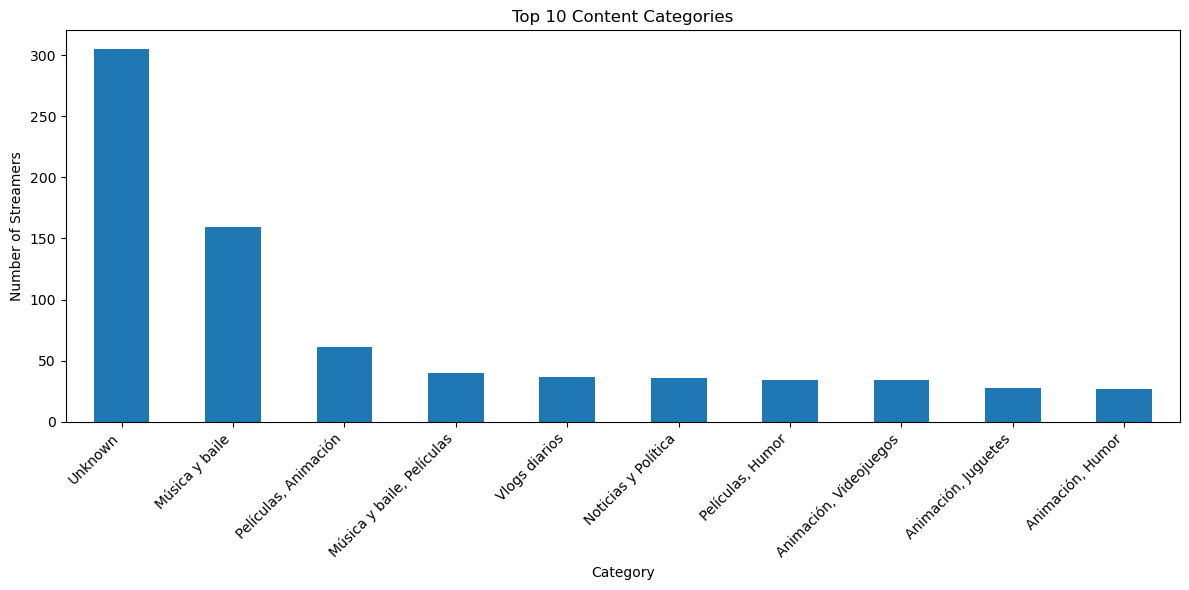

Top 10 categories by number of streamers:
Categories
Unknown                      305
Música y baile               159
Películas, Animación          61
Música y baile, Películas     40
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           28
Animación, Humor              27
Name: count, dtype: int64


In [2]:

    # Distribution of content categories
    category_counts = df['Categories'].value_counts()
    top_10_categories = category_counts.head(10)

    plt.figure(figsize=(12, 6))
    top_10_categories.plot(kind='bar')
    plt.title('Top 10 Content Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Streamers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("Top 10 categories by number of streamers:")
    print(top_10_categories)
    


    ## Categories with Exceptional Performance Metrics
    The top 5 categories by average performance metrics.
    

In [4]:

    # Categories with exceptional performance metrics
    performance_metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
    category_performance = df.groupby('Categories')[performance_metrics].mean().sort_values('Subscribers', ascending=False)

    print("Top 5 categories by average performance metrics:")
    print(category_performance.head())
    

Top 5 categories by average performance metrics:
                         Subscribers        Visits          Likes     Comments
Categories                                                                    
Juguetes                3.788000e+07  7.005100e+05    5290.200000     2.800000
Películas, Videojuegos  3.325000e+07  6.940375e+05   48083.375000  1569.500000
Animación, Juguetes     2.999286e+07  5.425286e+05    2740.964286     0.535714
Videojuegos, Humor      2.876471e+07  1.023968e+07  420511.764706  4827.058824
Música y baile          2.692956e+07  3.763516e+05   17510.056604  2011.132075



    ## Correlation between Performance Metrics
    Analyzing the correlation between different performance metrics.
    

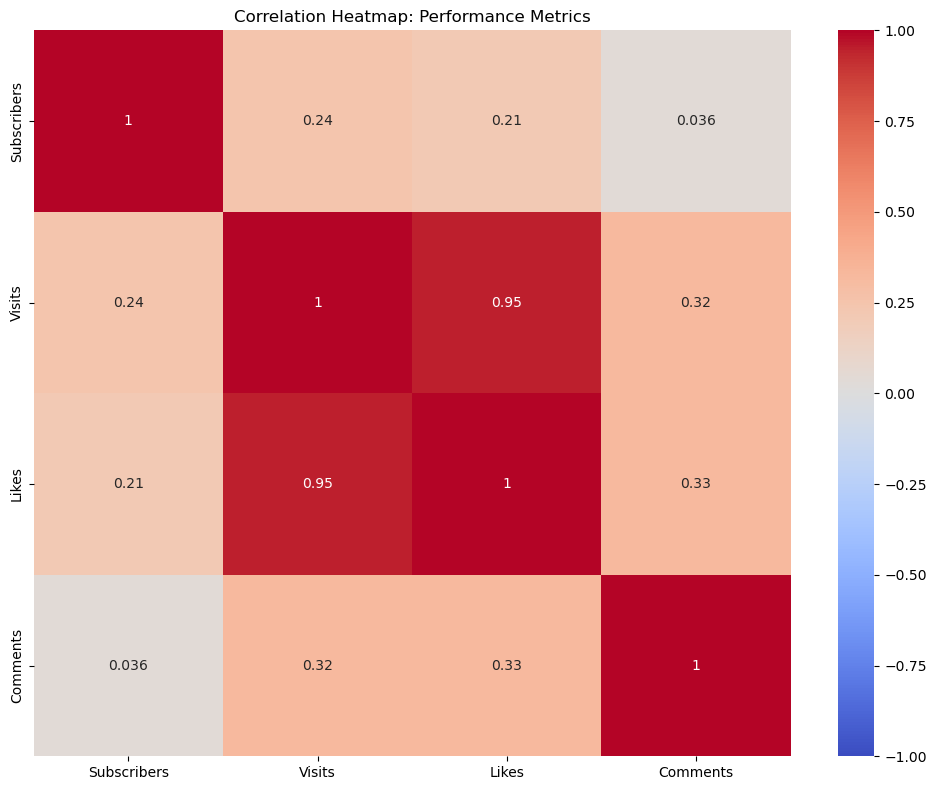

Correlation between performance metrics:
             Subscribers    Visits     Likes  Comments
Subscribers     1.000000  0.244950  0.211396  0.035985
Visits          0.244950  1.000000  0.950461  0.323924
Likes           0.211396  0.950461  1.000000  0.325785
Comments        0.035985  0.323924  0.325785  1.000000


In [5]:

    # Correlation between performance metrics
    correlation_matrix = df[performance_metrics].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap: Performance Metrics')
    plt.tight_layout()
    plt.show()

    print("Correlation between performance metrics:")
    print(correlation_matrix)
    


    ## Top-Performing Content Creators
    The top 10 performing content creators based on a composite performance score.
    

In [8]:

    # Top-performing content creators
df['PerformanceScore'] = (
    df['Subscribers'].rank(pct=True) +
    df['Visits'].rank(pct=True) +
    df['Likes'].rank(pct=True) +
    df['Comments'].rank(pct=True)
) / 4

top_performers = df.nlargest(10, 'PerformanceScore')[['Username', 'Categories', 'Subscribers', 'Visits', 'Likes', 'Comments', 'PerformanceScore']]

print("Top 10 performing content creators:")
print(top_performers)
    

Top 10 performing content creators:
                 Username          Categories  Subscribers       Visits  \
1                 Mrbeast  Videojuegos, Humor  183500000.0  117400000.0   
43               A4a4a4a4    Animación, Humor   47300000.0    9700000.0   
34            Taylorswift      Música y baile   54100000.0    4300000.0   
136              Mrbeast2       Vlogs diarios   31300000.0   83100000.0   
153             Dafuqboom    Animación, Humor   29800000.0   52700000.0   
62         Kimberlyloaiza      Música y baile   42100000.0    5300000.0   
123        Mrindianhacker             Unknown   32600000.0    6500000.0   
98   Technogamerzofficial             Unknown   35600000.0    6200000.0   
131          Fedevigevani    Animación, Humor   32000000.0    7700000.0   
26            Dudeperfect         Videojuegos   59700000.0    5300000.0   

         Likes  Comments  PerformanceScore  
1    5300000.0   18500.0          0.997485  
43    330400.0   22000.0          0.976358  
34 

In [9]:
# Calculate the average performance metrics
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify streamers with above-average performance
above_average_streamers = df[(df['Subscribers'] > average_metrics['Subscribers']) &
                             (df['Visits'] > average_metrics['Visits']) &
                             (df['Likes'] > average_metrics['Likes']) &
                             (df['Comments'] > average_metrics['Comments'])]

# Display the above-average streamers
print("Streamers with above-average performance:")
print(above_average_streamers[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']])

# Identify top-performing content creators based on a composite performance score
df['PerformanceScore'] = (
    df['Subscribers'].rank(pct=True) +
    df['Visits'].rank(pct=True) +
    df['Likes'].rank(pct=True) +
    df['Comments'].rank(pct=True)
) / 4

top_performers = df.nlargest(10, 'PerformanceScore')[['Username', 'Categories', 'Subscribers', 'Visits', 'Likes', 'Comments', 'PerformanceScore']]

print("\
Top 10 performing content creators:")
print(top_performers)

Streamers with above-average performance:
                  Username  Subscribers       Visits      Likes  Comments
1                  Mrbeast  183500000.0  117400000.0  5300000.0   18500.0
5                Pewdiepie  111500000.0    2400000.0   197300.0    4900.0
26             Dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             Taylorswift   54100000.0    4300000.0   300400.0   15000.0
39             Juegagerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          Kimberlyloaiza   42100000.0    5300000.0   271300.0   16000.0
64         Luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             Jessnolimit   39600000.0    1300000.0    73500.0    1600.0
96          Totalgaming093   36300000.0    1500000.0   129400.0    4900.0
98    Technogamerzofficial   35600000.0    6200000.0   341800.0   1650

To enhance content recommendations on YouTube, we can propose a system that leverages both the categories and performance metrics of streamers. Here's a brief outline of the proposed system:

1. **Categorical Filtering**: 
   - Use the categories of content (e.g., Music, Gaming, Education) to initially filter content based on user preferences or viewing history.

2. **Performance-Based Ranking**:
   - Rank content within each category using a composite performance score, which considers metrics like subscribers, visits, likes, and comments. This ensures that high-quality content is prioritized.

3. **User Engagement Metrics**:
   - Incorporate user engagement metrics such as watch time, likes, and shares to further refine recommendations. This helps in identifying content that resonates well with users.

4. **Personalization Algorithms**:
   - Implement machine learning algorithms to personalize recommendations based on individual user behavior, preferences, and historical data.

5. **Feedback Loop**:
   - Continuously gather user feedback to improve the recommendation system, ensuring it adapts to changing user preferences and trends.



    ## Conclusion
    The analysis provides insights into the distribution of content categories, performance metrics, and identifies top-performing content creators.
    